In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape


(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [8]:
#Target Column Understanding (Super Important for ML)
df['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

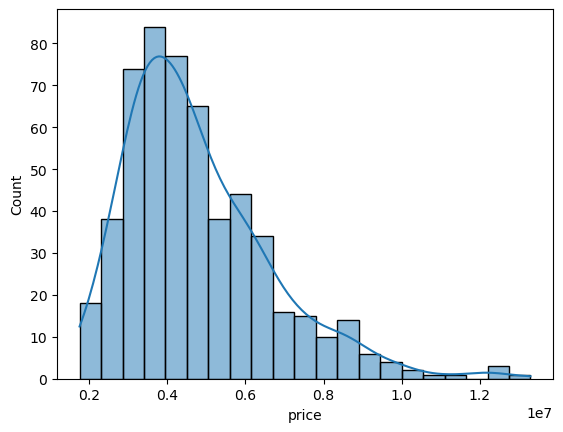

In [9]:
sns.histplot(df['price'],kde=True)

<Axes: ylabel='price'>

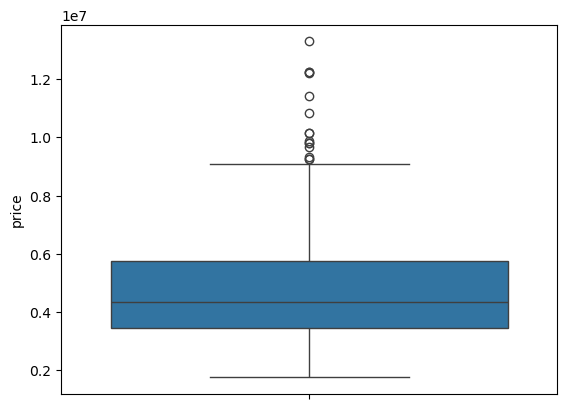

In [10]:
sns.boxplot(df['price'])

In [11]:
# ✅ STEP 4: Missing Values Handling (Compulsory)
# ✅ What are Missing Values?

# Missing values are empty entries in dataset stored as:

# NaN

# None

# blank cells
#df.isnull()#tells about the missing value present or not for each column and row
df.isnull().sum()#gives count of all the missing values for each column

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
#missing value in percentage no of missing value/total rows *100
(df.isnull().sum()/len(df))*100

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [13]:
len(df)

545

In [14]:
missing = df.isnull().sum()

In [15]:
missing_cols_count = (missing > 0).sum()

missing_cols_count

np.int64(0)

In [16]:
# if column have less missing value then drop the rows
# if column have more missing value then drop the columns
# else fill the data

In [17]:
col_missing = df.isnull().sum().sort_values(ascending=False)
col_missing

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
# ✅ Meaning:

# df.isnull() creates True/False table (True = missing)

# .sum(axis=1) adds missing values row-wise

# axis=1 → horizontal → across columns
row_missing = df.isnull().sum(axis=1)
row_missing


0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    0
542    0
543    0
544    0
Length: 545, dtype: int64

In [19]:
# how percentage hepls to decide weather to drop or fill?

In [20]:
col_missing_percent = (df.isnull().sum() / len(df)) * 100
col_missing_percent.sort_values(ascending=False)


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [21]:
# if percentage is very less the drop row
# if percentage is moderate then fill the column
# if  percentage is high then drop the column

In [22]:
row_missing.value_counts()

0    545
Name: count, dtype: int64

In [23]:
#if this value is 0 then data set is clean and we can apply lr
df.isnull().sum().sum()

np.int64(0)

In [24]:
# ✅ STEP 1: Identify categorical columns
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [25]:
for col in cat_col:
    print(col, ":", df[col].unique())


mainroad : ['yes' 'no']
guestroom : ['no' 'yes']
basement : ['no' 'yes']
hotwaterheating : ['no' 'yes']
airconditioning : ['yes' 'no']
prefarea : ['yes' 'no']
furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']


In [26]:
len(df)

545

In [30]:
row_missing = df.isnull().sum(axis=1)
row_missing_percent=(row_missing/df.shape[1])*100
row_missing_percent

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
540    0.0
541    0.0
542    0.0
543    0.0
544    0.0
Length: 545, dtype: float64

In [31]:
# missing value in percentage for each rows (no of missing value)/total column *100

In [32]:
# ⭐ Recommended rule (most commonly used)
# ✅ Drop row if missing % is very high

# Drop if ≥ 40% to 50% missing

# because too much information is missing → row becomes unreliable

# ✅ Keep + Fill if missing is low or medium

# 0% to 10% missing → fill easily, keep row

# 10% to 40% missing → depends on dataset size + importance

In [33]:
#decide it on basis of shape of data set if too many rows the delete it else keep it
#how to drop columns
# df = df.drop(columns=['column_name'])
#df = df.drop(columns=['col1', 'col2', 'col3'])
#df.drop(columns=['column_name'], inplace=True)#Drop column permanently (inplace)
#to drop a row use index number
#df = df.drop(index=5)  
#df.drop(index=[2,5], inplace=True)  Drop rows permanently
#df = df.dropna()   Drop rows having any missing value

# ✅ 4) Drop columns based on missing values %

# Example: drop columns having more than 40% missing values

#hold
# col_missing_percent = (df.isnull().sum() / len(df)) * 100
# df = df.drop(columns=col_missing_percent[col_missing_percent > 40].index


# 6) Drop duplicate rows
# df = df.drop_duplicates()


In [ ]:
# what to do if i want to make changes in row and column permenatly
#and what to do if i wan to make copy of it??
#df.drop(columns=['col_name'], inplace=True)
#to make copy
# df_copy = df.copy()
# df_copy.drop(columns=['col_name'], inplace=True)
#new_df = df[['col1', 'col2']].copy()

In [34]:
# #to fill certain row or column
# ✅ 1) Fill missing values in a Column
# 🔹 Fill with mean (for numeric column)
# df['Age'] = df['Age'].fillna(df['Age'].mean())

# 🔹 Fill with median (better if outliers exist)
# df['Age'] = df['Age'].fillna(df['Age'].median())

# 🔹 Fill with mode (for categorical column)
# df['City'] = df['City'].fillna(df['City'].mode()[0])

# 🔹 Fill with fixed value
# df['Age'] = df['Age'].fillna(0)


In [35]:
# ✅ 2) Fill missing values in Multiple Columns

# Example: Fill numeric columns with mean

# num_cols = ['Age', 'Salary', 'Marks']
# df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


# Example: Fill categorical columns with mode

# cat_cols = ['City', 'Gender']
# for col in cat_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

# ✅ 3) Fill missing values in the Whole DataFrame

# Fill all NaN with 0:

# df = df.fillna(0)


# Fill forward (previous value):

# df = df.fillna(method='ffill')


# Fill backward (next value):

# df = df.fillna(method='bfill')

# ✅ 4) Fill a Particular Row (important)

# If you want to fill missing values in a specific row index, example row index = 10:

# 🔹 Fill that row NaN with 0
# df.loc[10] = df.loc[10].fillna(0)

# 🔹 Fill that row NaN with mean of that column
# df.loc[10] = df.loc[10].fillna(df.mean(numeric_only=True))

# ✅ 5) Fill missing values using condition (smart way)

# Example: If missing Age, fill with mean Age

# df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean()

In [40]:
df=pd.read_csv("train.csv")

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.shape

(891, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [52]:
df.isnull().sum(axis=1).sort_values(ascending=False)

240    2
101    2
241    2
48     2
260    2
      ..
6      0
887    0
3      0
889    0
1      0
Length: 891, dtype: int64

In [55]:
missing_percent=((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
missing_percent

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64

In [56]:
df1=df.drop(columns='Cabin')

In [57]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [59]:
df1['Age']=df1['Age'].fillna(df1['Age'].mean())

df1

In [60]:
df1.shape

(891, 11)

In [61]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [62]:
df1.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

<Axes: ylabel='Embarked'>

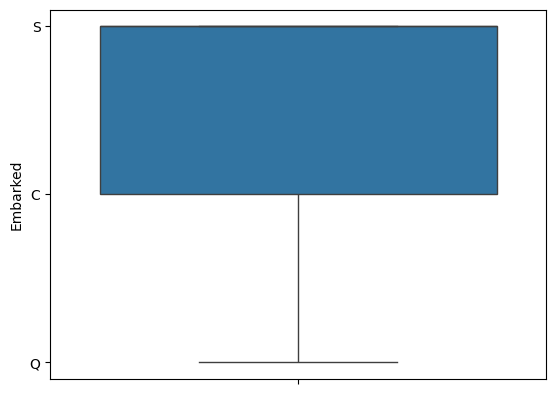

In [64]:
sns.boxplot(df1['Embarked'])

In [72]:
df1['Embarked']=df1['Embarked'].fillna(df1['Embarked'].mode()[0])

In [73]:
df1.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

In [71]:
df1['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [75]:
df1.notnull().sum(axis=1).sort_values(ascending=False)

890    11
0      11
1      11
2      11
3      11
       ..
30     11
31     11
32     11
33     11
34     11
Length: 891, dtype: int64

In [76]:
df.notnull().sum().sum()

np.int64(10003)

In [78]:
df.size

10692

In [79]:
df.isnull().values.any()

np.True_

In [80]:
df1.notnull().sum().sum()

np.int64(9801)

In [82]:
df1.size

9801

<Axes: ylabel='Age'>

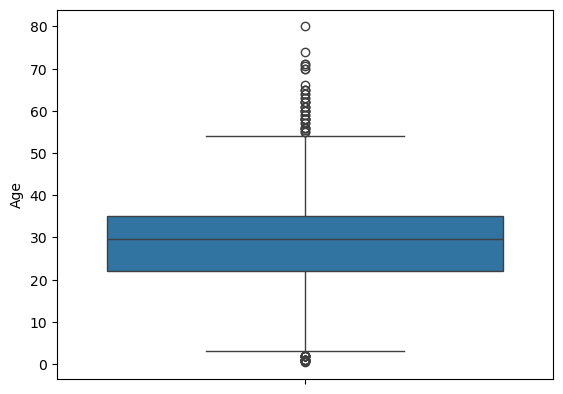

In [83]:
# ✅ This works perfectly.

# 📌 But best practice:

# Mean is okay

# Median is often better because Age has outliers.
sns.boxplot(df1['Age'])

<Axes: ylabel='Age'>

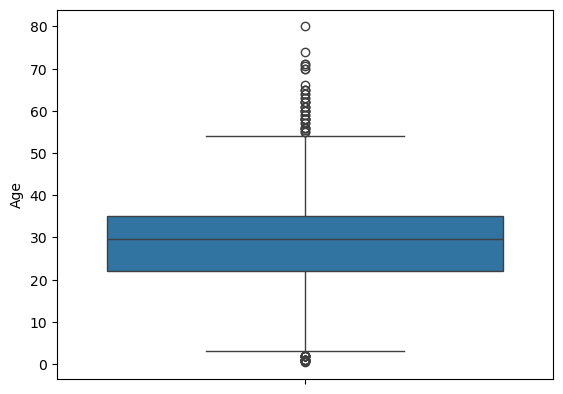

In [84]:
sns.boxplot(df['Age'])

In [85]:
df1['Age']=df1['Age'].fillna(df1['Age'].median())

<Axes: xlabel='Embarked', ylabel='count'>

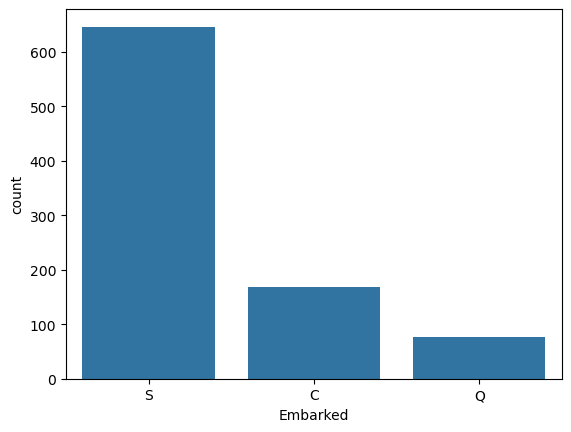

In [86]:
sns.countplot(x='Embarked', data=df1)

In [ ]:
# ✅ 3) Plot boxplot for Embarked
# sns.boxplot(df1['Embarked'])


# ⚠️ Small correction: boxplot is for numeric data, not categorical.

# Embarked is categorical, so use: